In [1]:
import importlib
import segmentation_model
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import cxr_feature_extraction

2022-06-09 00:15:11.712125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 00:15:11.712206: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
importlib.reload(segmentation_model)

<module 'segmentation_model' from '/home/joy/nn/cxr_interpreter/segmentation_model.py'>

In [5]:
importlib.reload(cxr_feature_extraction)

<module 'cxr_feature_extraction' from '/home/joy/nn/cxr_interpreter/cxr_feature_extraction.py'>

In [9]:
def process_img(img):
  _img = tf.io.read_file(img)
  _img = tf.image.decode_png(_img,channels = 1)
  # _img = tf.image.resize(_img,IMG_SIZE[:2])
  # _img /= 255 # Just for the efficientNet we dont need this
  return _img[:,:,0]

def show_img(path):
  plt.figure(figsize = (8,8))
  img = process_img(path)
  plt.imshow(img, cmap = 'gray')

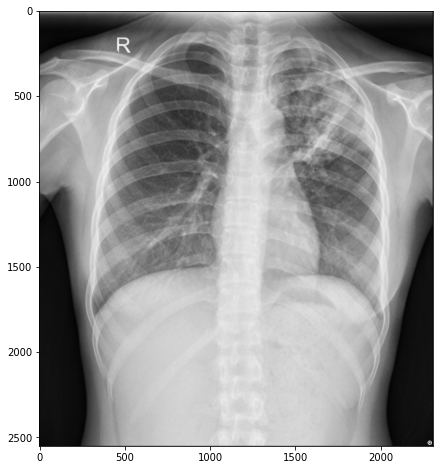

1/1 [==============================] - 2s 2s/step
Vertical Span Ratio (Right vs Left) =  1.0
Lung Area Ratio (Right vs Left) =  1.420620308738139
Height-to-Width Ratio of the thorax =  0.8716577540106952
Max Thoracic Width =  187.0
CT Ratio =  0.357
CT Area =  0.275
------------------------
Cp Angles
Right -> Angle Size = 48.81407483429033 Angle Direction = 69.4070374171452
Left -> Angle Size = 45.0 Angle Direction = 69.70259816176583


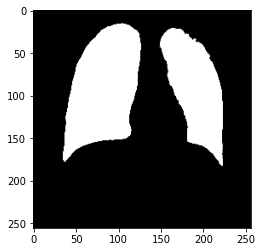

In [12]:
import os
img = os.listdir('../sample_cxr')
img = f'../sample_cxr/{np.random.choice(img)}'
img = '/home/joy/nn/Lung Segmentation/test/CHNCXR_0353_1.png'
show_img(img)
plt.show()
segment_model = segmentation_model.Segmentation_Model()
mask = segment_model.get_mask(img, plot = True)
lung_interpret = cxr_feature_extraction.LungIntepretation(mask)
lung_interpret.report()

In [7]:
import classifier
importlib.reload(classifier)
cxr_cls = classifier.CXR_Classifier()

2022-06-09 00:18:30.664595: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/joy/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-06-09 00:18:30.664661: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-09 00:18:30.664691: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ROG): /proc/driver/nvidia/version does not exist
2022-06-09 00:18:30.665842: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/joy/nn/nih_sample/sample/images/00016579_000.png
1/1 [==============================] - 3s 3s/step
changed
1/1 [==============================] - 0s 433ms/step


array([['Cardiomegaly', '0.0'],
       ['Emphysema', '0.0'],
       ['Effusion', '0.0'],
       ['Pneumothorax', '0.0'],
       ['Atelectasis', '0.0'],
       ['Mass', '0.0'],
       ['Edema', '0.0'],
       ['Consolidation', '3.1847904e-37']], dtype='<U32')

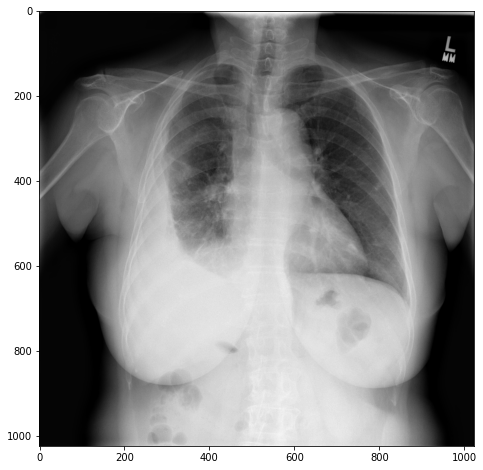

In [13]:
dir_ = '/home/joy/nn/nih_sample/sample/images/'
img = os.listdir(dir_)
img = os.path.join(dir_, np.random.choice(img))
print(img)
show_img(img)
well = cxr_cls.predict(img)
well

In [34]:
# well.T[1].argmax()
# well[1]
well

array([['Cardiomegaly', '0.00012447152'],
       ['Emphysema', '8.683238e-05'],
       ['Effusion', '8.152547e-05'],
       ['Pneumothorax', '0.00010039949'],
       ['Atelectasis', '0.00015576892'],
       ['Mass', '0.00010502499'],
       ['Edema', '0.00017839321'],
       ['Consolidation', '0.00016749647'],
       ['Fibrosis', '0.0023865611']], dtype='<U32')

In [10]:
cxr_cls.predict(img, 43, 'F', 'PA')

1/1 [==============================] - 0s 277ms/step


array([['Cardiomegaly', '0.0036605436'],
       ['Emphysema', '0.0025797237'],
       ['Effusion', '0.0144273555'],
       ['Pneumothorax', '0.009427754'],
       ['Atelectasis', '0.036727592'],
       ['Mass', '0.011932449'],
       ['Edema', '0.0026986147'],
       ['Consolidation', '0.022305936'],
       ['Fibrosis', '0.0035008325']], dtype='<U32')

In [19]:
cxr_cls.predict('/home/joy/nn/Lung Segmentation/CXR_png/CHNCXR_0443_1.png', 45, 'M')

1/1 [==============================] - 5s 5s/step


array([['Cardiomegaly', '5.1537376e-05'],
       ['Emphysema', '0.00029525312'],
       ['Effusion', '0.00037366984'],
       ['Nodule', '0.00027156936'],
       ['Pneumothorax', '7.6937686e-05'],
       ['Atelectasis', '8.211877e-05'],
       ['Pleural_Thickening', '0.00029182906'],
       ['Mass', '0.00058124674'],
       ['Edema', '6.807539e-05'],
       ['Consolidation', '7.4722e-05'],
       ['Infiltration', '2.685745e-05'],
       ['Fibrosis', '0.00021478265'],
       ['Pneumonia', '0.00016254302']], dtype='<U32')

In [4]:
cxr_cls.predict('/home/joy/nn/Lung Segmentation/CXR_png/CHNCXR_0443_1.png', 45, 'M')

1/1 [==============================] - 5s 5s/step


array([['Cardiomegaly', '0.00052245735'],
       ['Emphysema', '0.00060019246'],
       ['Effusion', '0.00056037103'],
       ['Nodule', '0.0005548831'],
       ['Pneumothorax', '0.00056509365'],
       ['Atelectasis', '0.0007258021'],
       ['Pleural_Thickening', '0.00205376'],
       ['Mass', '0.0007841525'],
       ['Edema', '0.0005359159'],
       ['Consolidation', '0.00076871924'],
       ['Infiltration', '0.000615503'],
       ['Fibrosis', '0.003352459'],
       ['Pneumonia', '0.0012332475']], dtype='<U32')

In [26]:
weights = cxr_cls._model.get_weights()
bias = cxr_cls._model.get_weights()
layers = cxr_cls._model.layers

In [53]:
weights = np.array(weights)
weights[-2][:17,0]

array([-0.02277233, -0.02390584, -0.02331188, -0.05183872, -0.04313606,
       -0.00841647, -0.03994127, -0.01886227, -0.04028618, -0.04474007,
       -0.03975628, -0.03218944, -0.0469116 , -0.01122481,  0.01306081,
       -0.00625615, -0.01610958], dtype=float32)